# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [5]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [6]:
print(classifier.predict([X_test[0]]))

[0]


## Predict the Test set results

In [7]:
y_pred = classifier.predict(X_test)
y_test_pred = np.c_[y_test, y_pred]

## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acs = accuracy_score(y_test, y_pred) 
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acs * 100}%")


Confusion Matrix:
 [[65  3]
 [ 8 24]]
Accuracy: 89.0%


## Visualizing the Training set results

/home/khalid/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_45706/2926997273.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


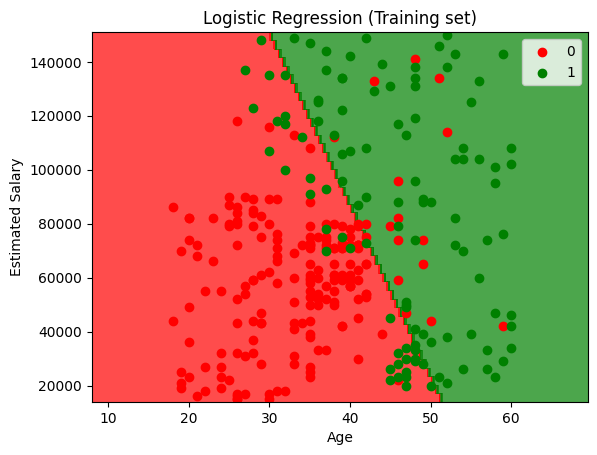

In [13]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
        X1.shape
    ),
    alpha=0.7,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Logistic Regression (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

## Visualizing the Test set results

/home/khalid/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_45706/1730307838.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


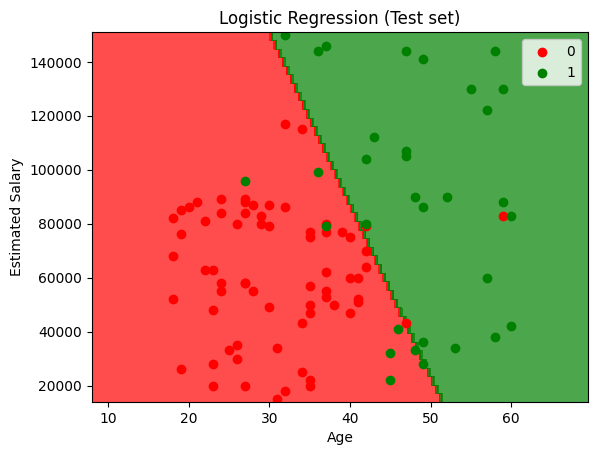

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
        X1.shape
    ),
    alpha=0.7,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Logistic Regression (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()